In [1]:
from keras.datasets import mnist
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
np.random.seed(10)

In [3]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [4]:
x_train = x_train_image.reshape(60000, 784).astype('float32')
x_test = x_test_image.reshape(10000, 784).astype('float32')

In [5]:
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [6]:
x_train_one_hot = np_utils.to_categorical(y_train_label)
y_test_one_hot = np_utils.to_categorical(y_test_label)

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.add(Dropout(0.5))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.add(Dense(units=1000, kernel_initializer='normal', activation='relu'))

In [11]:
model.add(Dropout(0.5))

In [12]:
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [13]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
train_history = model.fit(x=x_train_normalize, y=x_train_one_hot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 35s - loss: 0.3680 - acc: 0.8852 - val_loss: 0.1353 - val_acc: 0.9609
Epoch 2/10
 - 35s - loss: 0.1598 - acc: 0.9515 - val_loss: 0.0990 - val_acc: 0.9696
Epoch 3/10
 - 30s - loss: 0.1176 - acc: 0.9629 - val_loss: 0.0863 - val_acc: 0.9733
Epoch 4/10
 - 30s - loss: 0.0990 - acc: 0.9695 - val_loss: 0.0858 - val_acc: 0.9755
Epoch 5/10
 - 30s - loss: 0.0862 - acc: 0.9726 - val_loss: 0.0821 - val_acc: 0.9753
Epoch 6/10
 - 31s - loss: 0.0738 - acc: 0.9767 - val_loss: 0.0767 - val_acc: 0.9772
Epoch 7/10
 - 31s - loss: 0.0646 - acc: 0.9788 - val_loss: 0.0761 - val_acc: 0.9778
Epoch 8/10
 - 25s - loss: 0.0606 - acc: 0.9805 - val_loss: 0.0764 - val_acc: 0.9782
Epoch 9/10
 - 18s - loss: 0.0557 - acc: 0.9815 - val_loss: 0.0727 - val_acc: 0.9798
Epoch 10/10
 - 16s - loss: 0.0493 - acc: 0.9841 - val_loss: 0.0735 - val_acc: 0.9804


In [16]:
def show_train_history(train_history_p, train, validation):
    plt.plot(train_history_p.history[train])
    plt.plot(train_history_p.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

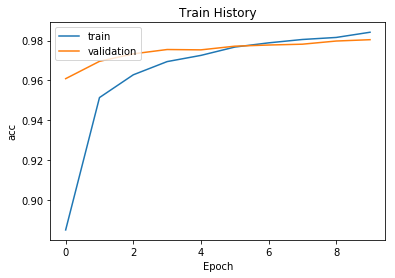

In [17]:
show_train_history(train_history, 'acc', 'val_acc')

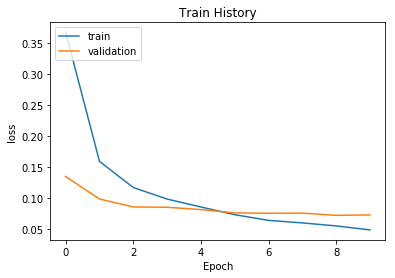

In [18]:
show_train_history(train_history, 'loss', 'val_loss')

In [19]:
scores = model.evaluate(x_test_normalize, y_test_one_hot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 2s 190us/step

accuracy= 0.9804


In [20]:
prediction = model.predict_classes(x_test)

In [21]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [22]:
def plot_images_labels_prediction(images, labels, prediction_i, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(images[idx], cmap='binary')
        title = 'label=' + str(labels[idx])
        if len(prediction_i) > 0:
            title += ', predict=' + str(prediction_i[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

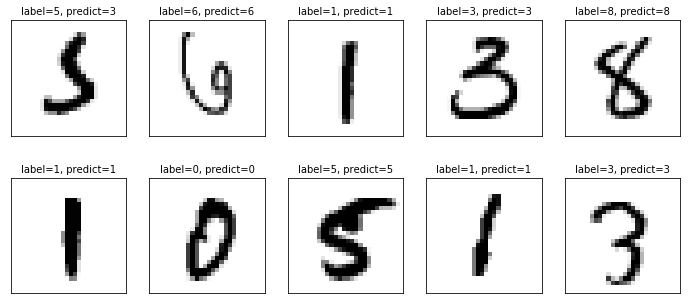

In [23]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340)

In [24]:
pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,969,1,0,1,0,1,5,1,1,1
1,0,1124,2,2,0,0,2,0,5,0
2,2,0,1018,2,1,0,2,5,2,0
3,1,0,2,994,0,4,0,5,2,2
4,2,2,1,0,959,0,6,1,0,11
5,2,0,0,8,1,868,5,1,2,5
6,1,2,0,1,2,4,948,0,0,0
7,1,6,7,3,0,0,0,1001,0,10
8,0,0,6,15,4,4,4,5,931,5


In [25]:
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [26]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
674,5,3
1393,5,3
2810,5,3
3902,5,3
4271,5,3
4360,5,3
5937,5,3


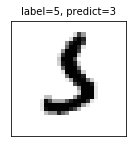

In [27]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340, num=1)